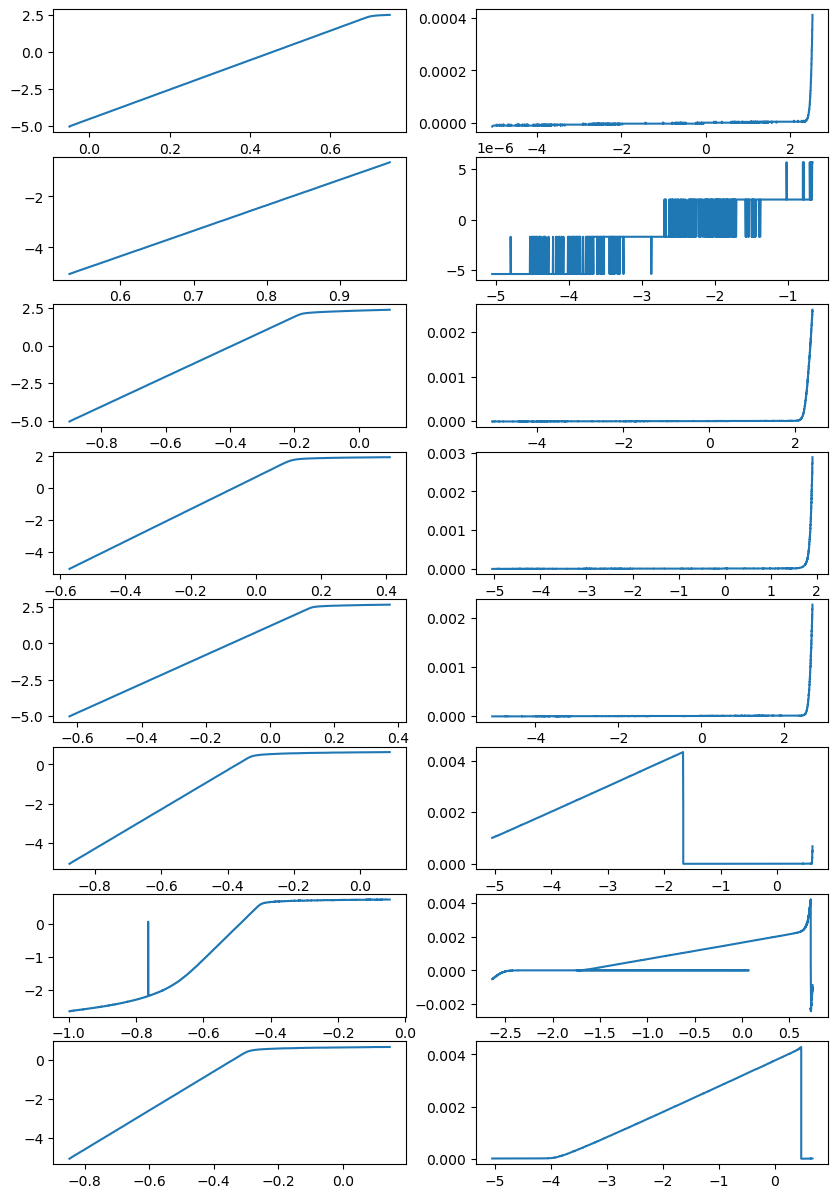

In [74]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

files = ['blue led.csv', 'red led.csv', 'green led.csv', 'yellow led.csv', 'white led.csv', 'rectifier diode.csv', 'z diode.csv', 'signal diode.csv']
data = []
for i in range(len(files)):
    data.append(pd.read_csv(files[i], skiprows=21, encoding='cp1252'))
fig, axes = plt.subplots(8,2)
fig.set_figheight(15)
fig.set_figwidth(10)

for i in range(len(data)):
    # min = data[i][["Channel 1 (V)"]].iloc[500:-100].idxmin(numeric_only=True).values[0]
    min = sp.signal.argrelmin(data[i][["Channel 1 (V)"]].values, order=20)[0][0]
    max = sp.signal.argrelmax(data[i][["Channel 1 (V)"]].values, order=5)
    # print(max)
    # print(min)
    data[i] = data[i].iloc[min:data[i][["Channel 1 (V)"]].iloc[min:-100].idxmax(numeric_only=True).values[0]]
    axes[i, 0].plot(data[i]["Time (s)"], data[i]["Channel 1 (V)"])
    axes[i, 1].plot(data[i]["Channel 1 (V)"], data[i]["Math 1 (A)"])